# Cálculo de Métricas de Evaluación para Clasificación:

## Ejemplo/Ejercicio:

In [7]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Cargar el conjunto de datos
digits = load_digits()
X, y = digits.data, digits.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo usando regresion logistica
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Mostrar las métricas
print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recuperación o sensibilidad (recall):", recall)
print("Puntuación o medida F1 (F1-score):", f1)

Exactitud: 0.9722222222222222
Precisión: 0.9725599634194969
Recuperación o sensibilidad (recall): 0.9722222222222222
Puntuación o medida F1 (F1-score): 0.9722809227439473


In [11]:
print(y)

[0 1 2 ... 8 9 8]


### TAREA en clase/casa (reference - pumpkins homework):

Usando alguna herramienta de IA, consultar (dos versiones: para codificar "a mano" y con código python existente en bobliotecas):

1. Qué es y cómo se obtiene la matriz de confusíón.
2. Analizar el resultado de la matriz de confusión del anterior ejemplo/ejercicio.
3. Obtener las formulas de TP, TN, FP, FN, precision, recall, F1-score, support.
4. Apartir de la matriz de confusión, interpretar los resultados del item 3.
5. Con base en lo anterior, calcular, graficar e interpretar: FPR, TPR, ROC, AUC.


1. La matriz de confusión es una herramienta que se utiliza en la evaluación del rendimiento de un modelo de clasificación en aprendizaje automático. Es una tabla que permite visualizar el desempeño del algoritmo mostrando las predicciones correctas e incorrectas en comparación con las verdaderas etiquetas de los datos.

Una matriz de confusión para un problema de clasificación binaria tiene la siguiente estructura:

|               | Predicción Positiva | Predicción Negativa |
|---------------|---------------------|---------------------|
| **Real Positivo** | Verdaderos Positivos (TP) | Falsos Negativos (FN) |
| **Real Negativo** | Falsos Positivos (FP)     | Verdaderos Negativos (TN) |

Cada uno de estos elementos tiene un significado específico:

- **Verdaderos Positivos (TP)**: Número de casos que son positivos y que el modelo predijo correctamente como positivos.
- **Falsos Negativos (FN)**: Número de casos que son positivos pero que el modelo predijo incorrectamente como negativos.
- **Falsos Positivos (FP)**: Número de casos que son negativos pero que el modelo predijo incorrectamente como positivos.
- **Verdaderos Negativos (TN)**: Número de casos que son negativos y que el modelo predijo correctamente como negativos.

A partir de esta matriz, se pueden calcular varias métricas de rendimiento importantes, tales como:

- **Precisión (Accuracy)**: \( \frac{TP + TN}{TP + TN + FP + FN} \)
- **Precisión o Valor Predictivo Positivo (Precision)**: \( \frac{TP}{TP + FP} \)
- **Sensibilidad o Recall (Recall)**: \( \frac{TP}{TP + FN} \)
- **Especificidad (Specificity)**: \( \frac{TN}{TN + FP} \)
- **Medida F1 (F1 Score)**: \( \frac{2 \cdot (Precision \cdot Recall)}{Precision + Recall} \)

La matriz de confusión proporciona una manera completa de analizar no solo cuántas predicciones fueron correctas, sino también los tipos de errores cometidos por el modelo. Esto es crucial para entender y mejorar el rendimiento del modelo en tareas de clasificación.

In [12]:
from sklearn.metrics import confusion_matrix


In [13]:
confusion = confusion_matrix(y_test, y_pred)

In [14]:
print("Matriz de confusión:")
print(confusion)


Matriz de confusión:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  1  0  0 44  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]


Conclusiones:

El modelo es preciso en la mayoría de las categorías, pero podría mejorarse en la diferenciación entre algunos pares de clases, como 0 y 5, 4 y 6, y 9 y 7.
Un análisis más profundo de los errores específicos (por ejemplo, utilizando imágenes de ejemplo) podría ayudar a identificar las causas de las confusiones y ajustar el modelo para mejorar su rendimiento.

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

Exactitud: 0.9722222222222222
Precisión: 0.9725599634194969
Recuperación o sensibilidad (recall): 0.9722222222222222
Puntuación o medida F1 (F1-score): 0.9722809227439473


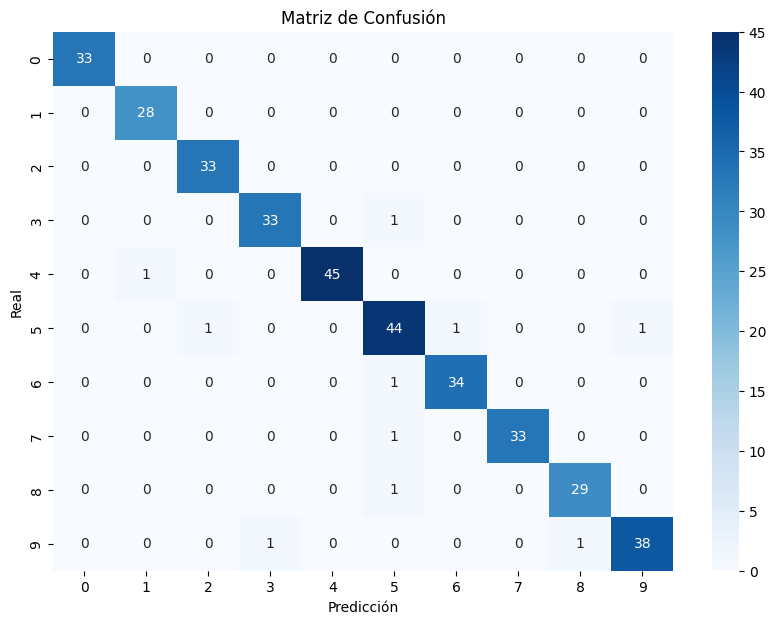

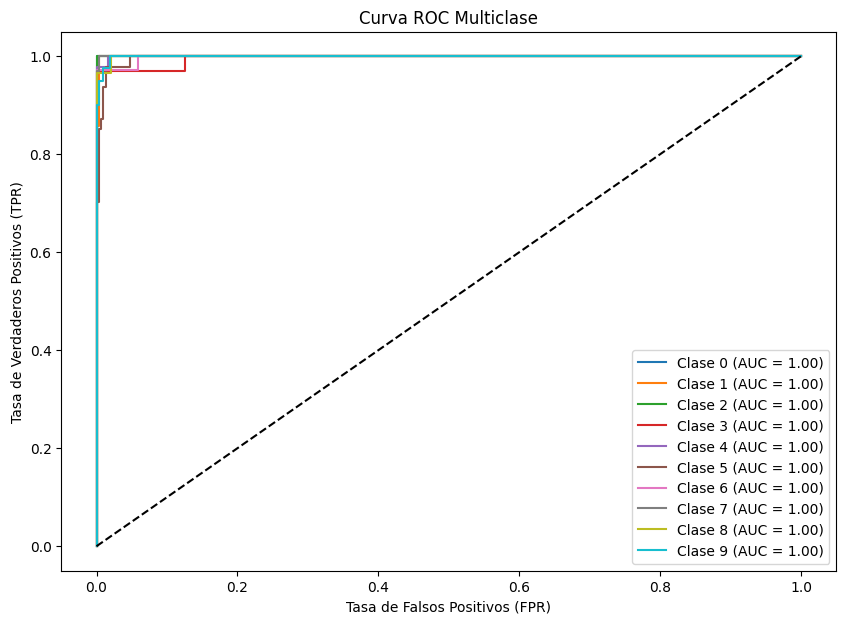

In [22]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

# Cargar el conjunto de datos
digits = load_digits()
X, y = digits.data, digits.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo usando regresion logistica
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Mostrar las métricas
print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recuperación o sensibilidad (recall):", recall)
print("Puntuación o medida F1 (F1-score):", f1)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Binarizar las etiquetas para el cálculo de ROC y AUC
y_test_bin = label_binarize(y_test, classes=digits.target_names)
y_pred_prob = model.predict_proba(X_test)

# Calcular FPR, TPR y AUC para cada clase
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(digits.target_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])

# Graficar las curvas ROC para cada clase
plt.figure(figsize=(10, 7))
for i in range(len(digits.target_names)):
    plt.plot(fpr[i], tpr[i], label=f'Clase {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC Multiclase')
plt.legend(loc='lower right')
plt.show()
